## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [69]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [71]:
# No any categorical variables

### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [72]:
for i in range(len(df.columns)):
    missing_data = df[df.iloc[:, i].isnull()].shape[0]
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<Axes: >

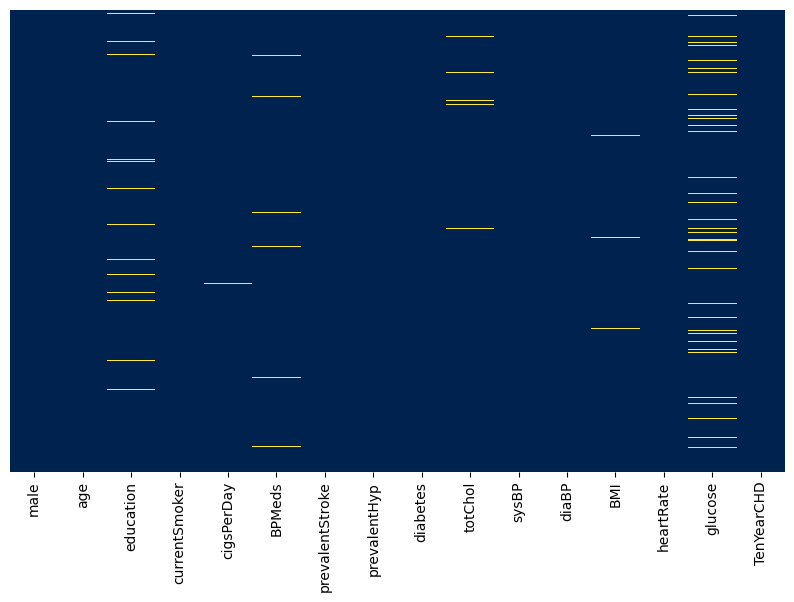

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='cividis', yticklabels=False)

### Import SimpleImputer

In [74]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [75]:
imputer = SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [76]:
data = df.values

In [77]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [78]:
imputer.fit(df)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [79]:
df_imputed_numpy_array = imputer.transform(df)
df_imputed = pd.DataFrame(df_imputed_numpy_array, columns=df.columns)

### Sanity Check: Whether missing values are filled or not

In [80]:
missing_before = df.isnull().sum().sum()
print('Missing cells:', missing_before)

Missing cells: 645


In [81]:
missing_after = df_imputed.isnull().sum().sum()
print('Missing cells:', missing_after)

Missing cells: 0


In [82]:
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


### Let's try to visualize the missing values.

<Axes: >

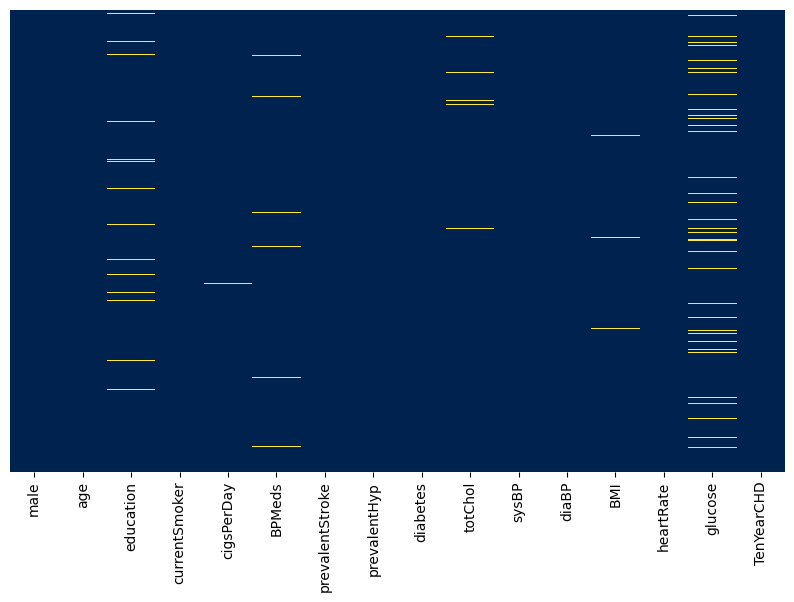

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='cividis', yticklabels=False)

<Axes: >

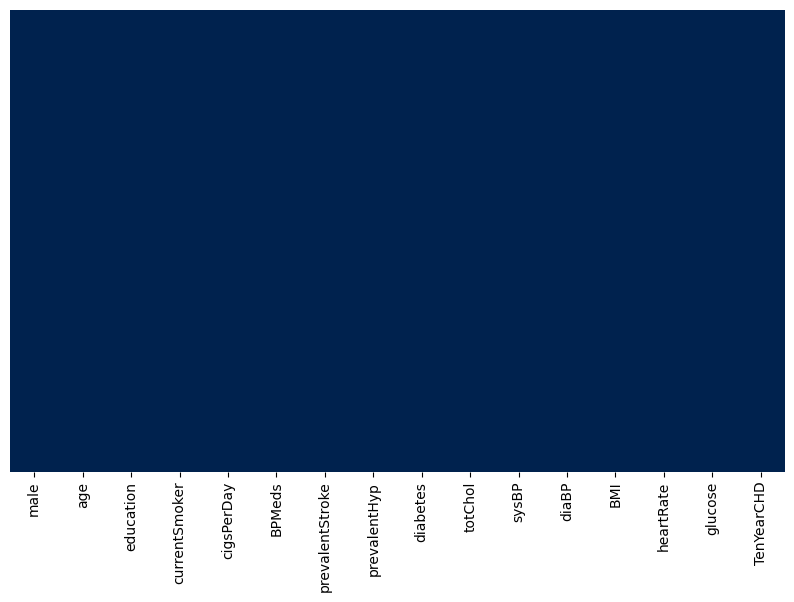

In [84]:
plt.figure(figsize=(10,6))
sns.heatmap(df_imputed.isna(), cbar=False, cmap='cividis', yticklabels=False)

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [85]:
df_imputed = pd.DataFrame(df_imputed_numpy_array, columns=df.columns)
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


<Axes: >

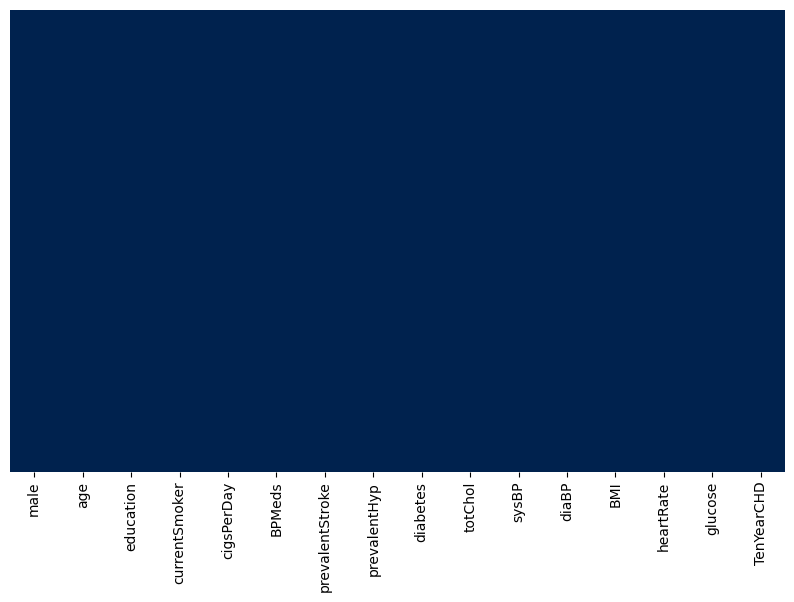

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(df_imputed.isna(), cbar=False, cmap='cividis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [87]:
X_train = pd.read_csv("loan_prediction/X_train.csv")
Y_train = pd.read_csv("loan_prediction/Y_train.csv")
Y_test = pd.read_csv("loan_prediction/Y_test.csv")
X_test = pd.read_csv("loan_prediction/X_test.csv")

In [88]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

In [89]:
# Concatenate training data (features and labels)
train_data = pd.concat([X_train, Y_train], axis=1)

# Concatenate testing data (features and labels)
test_data = pd.concat([X_test, Y_test], axis=1)

# Concatenate training and testing data to create the final dataset
full_dataset = pd.concat([train_data, test_data], axis=0)

# Optionally, reset the index of the final dataset
full_dataset.reset_index(drop=True, inplace=True)

<Axes: >

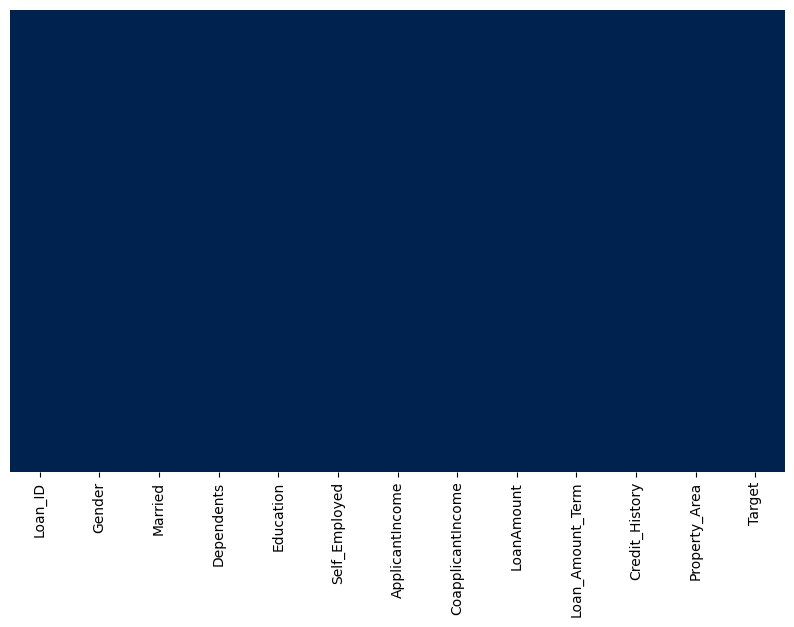

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(full_dataset.isna(), cbar=False, cmap='cividis', yticklabels=False)

### Is there missing data in this dataset???

In [91]:
# Looking at the heatmap it doesn't look like it has missing values.
# But it's better to check with the numerical values.

for i in range(len(full_dataset.columns)):
    missing_data = full_dataset[full_dataset.iloc[:, i].isnull()].shape[0]
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')
    
# It's confirm that, this dataset doesn't have any missing values.

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 0  |  Percentage: 0.0
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 0  |  Percentage: 0.0
Feature 6 >> Missing entries: 0  |  Percentage: 0.0
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 0  |  Percentage: 0.0
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 0  |  Percentage: 0.0


# Build a Logistic Regression model Without imputation

In [92]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [94]:
model = LogisticRegression()

In [95]:
model.fit(X,y)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [97]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [98]:
df.shape

(4238, 16)

### Drop rows with missing values

In [99]:
# Drop rows with missing values
full_dataset_no_missing = full_dataset.dropna()
# Reset the index of the new DataFrame
full_dataset_no_missing.reset_index(drop=True, inplace=True)

### Split dataset into X and y

In [100]:
X = df.drop("TenYearCHD", axis=1)

In [101]:
y = df["TenYearCHD"]

### Create a pipeline with model parameter

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values (you can customize this)
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', LogisticRegression())  # Logistic Regression model
])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [103]:
# Set the number of splits and repeats
n_splits = 10
n_repeats = 3
random_state = 1

# Create RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [104]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=rskf)

In [105]:
scores

array([0.85377358, 0.85613208, 0.8490566 , 0.85377358, 0.86320755,
       0.85613208, 0.84669811, 0.85377358, 0.86288416, 0.85815603,
       0.85377358, 0.84669811, 0.84433962, 0.86084906, 0.84669811,
       0.86320755, 0.85377358, 0.85613208, 0.85815603, 0.86524823,
       0.85613208, 0.85849057, 0.85141509, 0.84433962, 0.8490566 ,
       0.85141509, 0.8490566 , 0.86320755, 0.85579196, 0.85579196])

### Print the Mean Accuracy and Standard Deviation from scores

In [106]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.855  | Std: 0.006


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [108]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [109]:
df.shape

(4238, 16)

In [110]:
X = df.drop("TenYearCHD", axis=1)

In [111]:
y = df["TenYearCHD"]

### Create a SimpleImputer with mean strategy

In [112]:
imputer = SimpleImputer(strategy='mean')

### Create a Logistic Regression model

In [113]:
lr_model = LogisticRegression()

### Create a pipeline with impute and model parameters

In [114]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', StandardScaler()),
    ('classifier', lr_model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Benchmark the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8573113207547169


### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [115]:
# Set the number of splits and repeats
n_splits = 10
n_repeats = 3
random_state = 1

# Create RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [116]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=rskf)

In [117]:
scores

array([0.85377358, 0.85613208, 0.8490566 , 0.85377358, 0.86320755,
       0.85613208, 0.84669811, 0.85377358, 0.86288416, 0.85815603,
       0.85377358, 0.84669811, 0.84433962, 0.86084906, 0.84669811,
       0.86320755, 0.85377358, 0.85613208, 0.85815603, 0.86524823,
       0.85613208, 0.85849057, 0.85141509, 0.84433962, 0.8490566 ,
       0.85141509, 0.8490566 , 0.86320755, 0.85579196, 0.85579196])

### Print the Mean Accuracy and Standard Deviation

In [118]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.855  | Std: 0.006


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

1. Both mean accuracy are almost similar.
2. While the mean accuracy is one aspect of model performance, considering the standard deviation provides insights into the stability or consistency of the model across different cross-validation folds and repeats.
3. A smaller standard deviation generally indicates more consistent performance.

# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [120]:
imputer = SimpleImputer(strategy='mean')

### Create a RandomForest model

In [121]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

### Create a pipeline

In [122]:
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', StandardScaler()),
    ('classifier', rf_model)
])

### Create RepeatedStratifiedKFold

In [123]:
# Set the number of splits and repeats
n_splits = 10
n_repeats = 3
random_state = 1

# Create RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

### Create Cross_val_score

In [124]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=rskf)

### Print Mean Accuracy and Standard Deviation

In [63]:
scores

array([0.85849057, 0.84433962, 0.8490566 , 0.83018868, 0.86084906,
       0.85141509, 0.8490566 , 0.84669811, 0.8534279 , 0.85106383,
       0.84433962, 0.84198113, 0.8490566 , 0.85377358, 0.84669811,
       0.85377358, 0.84433962, 0.84433962, 0.84869976, 0.85815603,
       0.84198113, 0.84433962, 0.84433962, 0.84198113, 0.84433962,
       0.84669811, 0.84198113, 0.8490566 , 0.85106383, 0.85106383])

# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [64]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.1/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 0.3/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.5/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.6/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.8/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 0.9/99.8 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 1.0/99.8 MB 3.2 MB/s eta 0:00:31
   ---------------------------------------- 1.2/99.8 MB 3.4 MB/s eta 0:00:30
    ----------------------------

In [126]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

strategies = ["mean", "median", "most_frequent", "constant"]
algorithms = ["Logistic Regression", "KNN", "Random Forest", "SVM", "XGBoost"]

for algorithm in algorithms:
    for strategy in strategies:
        print(algorithm, strategy)
        
        imputer = SimpleImputer(strategy=strategy)
        
        if algorithm == "Logistic Regression":
            model = LogisticRegression()
        elif algorithm == "KNN":
            model = KNeighborsClassifier(n_neighbors=2)
        elif algorithm == "Random Forest":
            model = RandomForestClassifier(n_estimators=100, random_state=42)
        elif algorithm == "SVM":
            model = SVC(kernel='rbf', C=1.0)
        elif algorithm == "XGBoost":
            model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
        
        pipeline = Pipeline([
            ('imputer', imputer),
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        
        # Set the number of splits and repeats
        n_splits = 10
        n_repeats = 3
        random_state = 1

        # Create RepeatedStratifiedKFold
        rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
        
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=rskf)
        # Print mean and standard deviation of the scores
        print(f"Mean Accuracy: {scores.mean():.4f}")
        print(f"Standard Deviation: {scores.std():.4f}")
        print("")
        
# Restore the default warning behavior (optional)
warnings.filterwarnings("default")

Logistic Regression mean
Mean Accuracy: 0.8546
Standard Deviation: 0.0058

Logistic Regression median
Mean Accuracy: 0.8546
Standard Deviation: 0.0058

Logistic Regression most_frequent
Mean Accuracy: 0.8547
Standard Deviation: 0.0058

Logistic Regression constant
Mean Accuracy: 0.8537
Standard Deviation: 0.0057

KNN mean
Mean Accuracy: 0.8366
Standard Deviation: 0.0067

KNN median
Mean Accuracy: 0.8366
Standard Deviation: 0.0069

KNN most_frequent
Mean Accuracy: 0.8359
Standard Deviation: 0.0067

KNN constant
Mean Accuracy: 0.8388
Standard Deviation: 0.0076

Random Forest mean
Mean Accuracy: 0.8479
Standard Deviation: 0.0060

Random Forest median
Mean Accuracy: 0.8493
Standard Deviation: 0.0069

Random Forest most_frequent
Mean Accuracy: 0.8471
Standard Deviation: 0.0056

Random Forest constant
Mean Accuracy: 0.8479
Standard Deviation: 0.0062

SVM mean
Mean Accuracy: 0.8482
Standard Deviation: 0.0037

SVM median
Mean Accuracy: 0.8482
Standard Deviation: 0.0037

SVM most_frequent
Mean 

# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [ ]:
# Median

# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [ ]:
# Logistic regressionn

# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [ ]:
# Logistic Regression algorithm with Most frequent strategy